In [1]:
import numpy as np      
import pandas as pd       
from scipy import stats    

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [6]:
df = pd.read_csv('walmart.csv')
ans1 = df.shape[0]
df.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


в) Разберитесь с пропущенными переменными:

    Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
    Визуализируйте пропуски с помощью функции sns.heatmap. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные 10%

наблюдений из исходной таблички методом .sample( ) и визуализируйте их.
Запишите в переменную ans2 число переменных, которые имеют более 60%
пропусков.
Удалите эти переменные из набора данных.

In [7]:
ans2 = df.isnull().sum()[100*df.isnull().sum()/df.shape[0] > 60].count()
100*df.isnull().sum()/df.shape[0]

Store            0.000000
Date             0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.736909
MarkDown2       74.143014
MarkDown3       67.825095
MarkDown4       68.363782
MarkDown5       64.570019
CPI              0.000000
Unemployment     0.000000
dtype: float64

<AxesSubplot:>

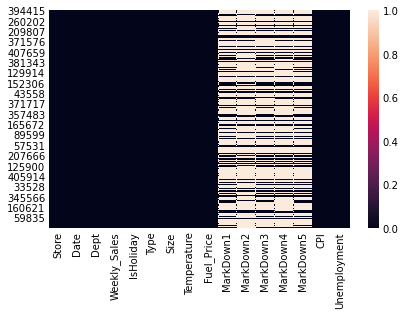

In [8]:
sns.heatmap(df.sample(frac = 0.1).isnull())

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`. 

In [9]:
ans3 = len(df['Store'].unique())
ans4 = len(df['Dept'].unique())


142

In [10]:
import datetime

df['Timestamp'] = pd.to_datetime(df['Date'])
df['Timestamp'].max() - df['Timestamp'].min()
ans5 = 987

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны? 

In [11]:
df.groupby(['Date']).sum()['Weekly_Sales'].sort_values()
ans6 = '2010-12-24'

Text(0, 0.5, 'Capasity')

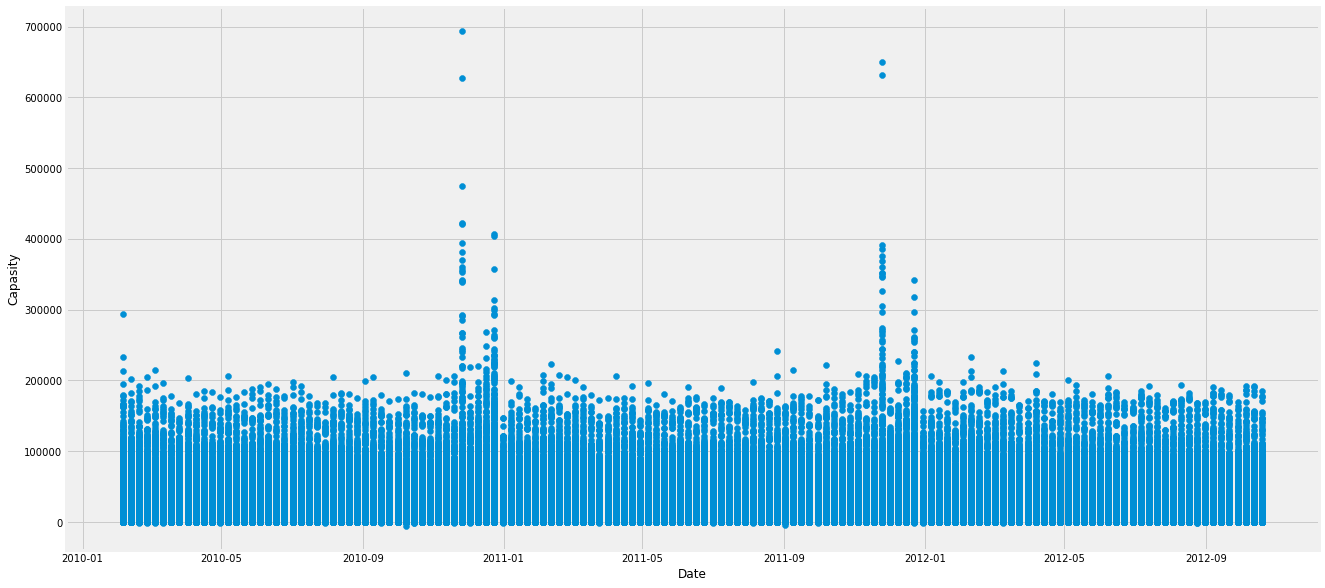

In [12]:
plt.figure(figsize=(20,10));
plt.scatter(df['Timestamp'], df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Capasity')


е) Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную ans7 (корреляция мб отрицательной).

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.


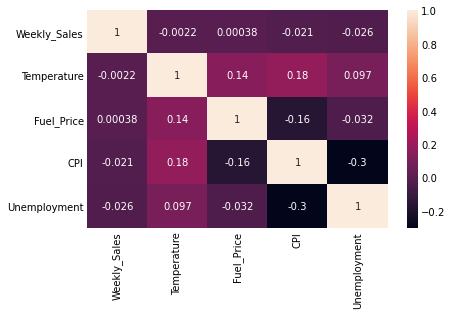

In [13]:
df7 = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
df7.corr()
sns.heatmap(df7.corr(), annot=True)
plt.show()
ans7 = 0.3

Постройте между этими же переменными облака рассеивания методом sns.pairplot. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные 10% наблюдений для картинки с помощью метода .sample( ).

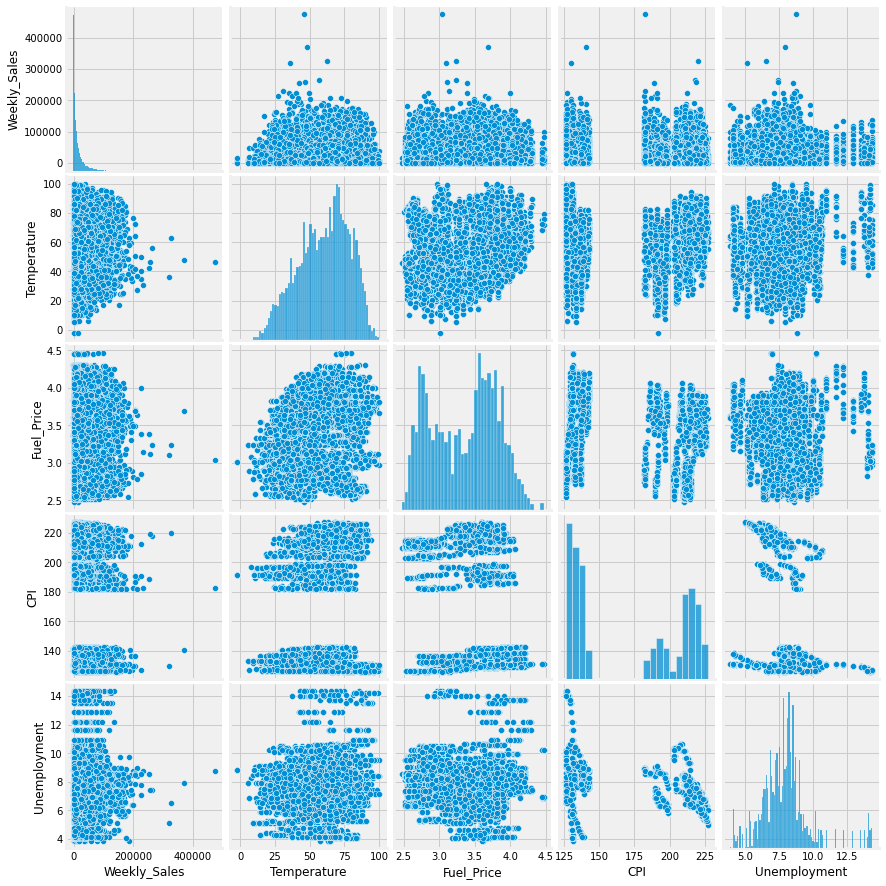

In [14]:
sns.pairplot(df7.sample(frac = 0.1))

 Найдите топ-5 самых больших магазинов по суммарным продажам

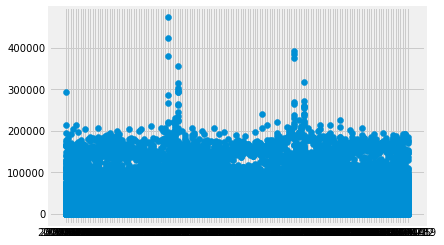

In [15]:
top5stores = list(df.groupby(['Store']).sum()['Weekly_Sales'].sort_values().index[-5:])
df5stores = df[df['Store'].isin(top5stores)]
df5stores[['Store', 'Weekly_Sales']]
plt.scatter(df5stores['Date'],df5stores['Weekly_Sales'])

ж) Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А

In [16]:
indexes_a = df['Dept'][df['Type'] == 'A'].index
dfa = df[df.index.isin(indexes_a)]
dfa.groupby(['Dept']).sum()['Weekly_Sales'].sort_values()[-10:]

Dept
93    1.353205e+08
94    1.595790e+08
2     1.624953e+08
40    1.675846e+08
91    1.679659e+08
72    1.774588e+08
38    2.031445e+08
90    2.203874e+08
95    3.034455e+08
92    3.503512e+08
Name: Weekly_Sales, dtype: float64